## Import all the libraries

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Dataset 
Reference Link to download: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1429_1.csv") 


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
## Slice out the Data
data = data[['reviews.text','reviews.rating']]

In [ ]:
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [ ]:
data.rename(columns = {'reviews.text':'review','reviews.rating':'rating'},inplace = True)

In [ ]:
data.rating.value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64

In [ ]:
#Label all the review above 3 as 1 and others as 0
def convert_rating_to_labels(x):
    if x >= 4.0 and x <= 5.0:
        return 1
    if x<4.0:
        return 0

In [ ]:
data['Label'] = data["rating"].apply(convert_rating_to_labels)

In [ ]:
data.Label.value_counts()

1.0    32316
0.0     2311
Name: Label, dtype: int64

## Pre-process Reviews

In [ ]:
import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    final_text=''.join(no_punct)
    return final_text

def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['review'] = df['review'].apply(str)
  df['review']=df['review'].apply(lambda x: remove_punctuation(x.lower()))
  stemmer = PorterStemmer()
  words = stopwords.words("english") 
  df['processed_reviews'] = df['review'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [ ]:
data = text_process(data)

In [ ]:
data.head()

,review,rating,Label,processed_reviews
0,this product so far has not disappointed my ch...,5.0,1.0,product far disappoint children love use like ...
1,great for beginner or experienced person bough...,5.0,1.0,great beginn experienc person bought gift love
2,inexpensive tablet for him to use and learn on...,5.0,1.0,inexpens tablet use learn step nabi thrill lea...
3,ive had my fire hd 8 two weeks now and i love ...,4.0,1.0,ive fire hd two week love tablet great valuew ...
4,i bought this for my grand daughter when she c...,5.0,1.0,bought grand daughter come visit set user ente...


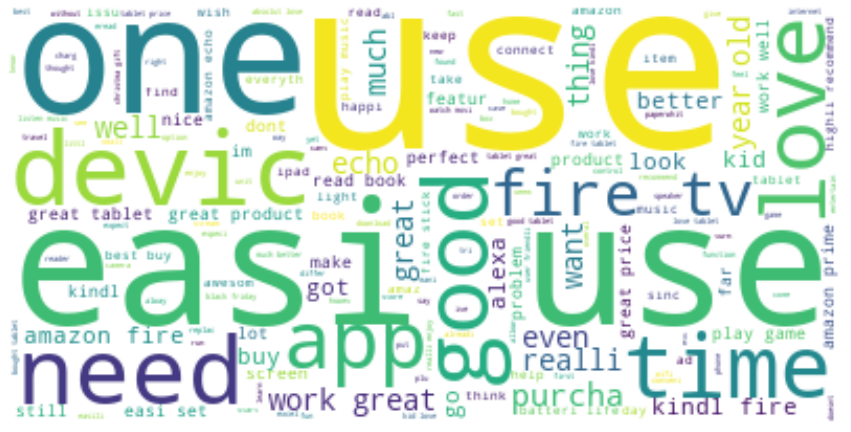

In [ ]:
from wordcloud import STOPWORDS, WordCloud
text = " ".join(i for i in data.processed_reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create Tf-Idf and Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

In [ ]:
review_data = data['processed_reviews']
tfidf_vect = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
tfidf = tfidf_vect.fit_transform(review_data)

vectorizer_counter = CountVectorizer(ngram_range=(1,1))

In [ ]:
tfidf_norm = normalize(tfidf)
tfidf_array = tfidf_norm.toarray()

In [ ]:
pd.DataFrame(tfidf_array,columns = tfidf_vect.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abil,abl,abroad,absolut,absolutli,abund,abus,ac,...,youtub,youv,yr,yrold,zero,zip,zippi,zone,zoom,zwave
0,0.0,0.0,0.317442,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.106521,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# PCA Component
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.fit_transform(tfidf_array)

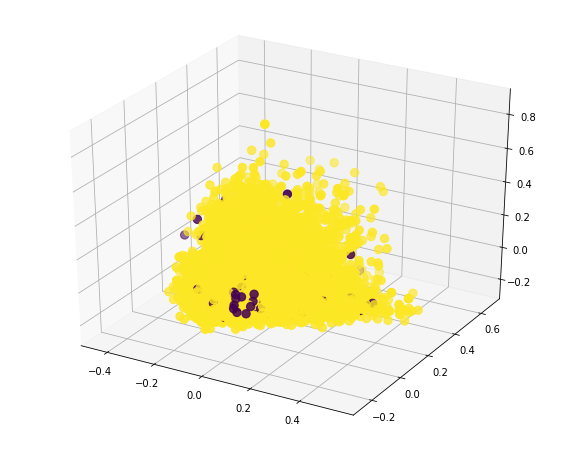

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(Y_sklearn[:,1], Y_sklearn[:,0], Y_sklearn[:,2], c=data.Label,s=70, cmap='viridis')
plt.show()


## Splitting of Data

In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['processed_reviews'].tolist(), data['Label'].tolist(), test_size=0.2, random_state=42)

In [ ]:
#A common method To run and execute any classifier Model, input Classifier
from sklearn import metrics
def run_model_conf_matrix(classifier_clf):
  classifier_model = classifier_clf.fit(X_train,Y_train)
  predictions = classifier_model.predict(X_test)
  print(np.mean(predictions== Y_test))
  return metrics.confusion_matrix(Y_test,predictions)

## Applying ML Models
#### 1. Random Forest
#### 2. MultiNomial NB
#### 3. Bernoulli NB
#### 4. SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
#Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#LinearModel Pipeline Feature selection
from sklearn.linear_model import SGDClassifier

In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
random_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
print("Random Forest Classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(random_classifier)
print(confusion_matrix)

Random Forest Classifier - Count Vectorizer:
0.9318509962460294
[[  40  432]
 [  40 6414]]


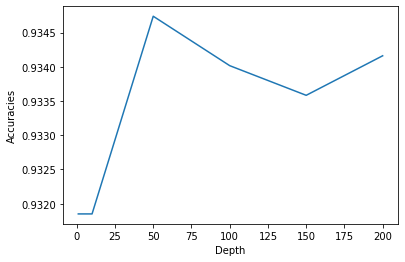

[0.9318509962460294, 0.9318509962460294, 0.9347386658966215, 0.9340167484839734, 0.9335835980363847, 0.9341611319665031]


In [ ]:
# Randomforest classifier - Count vectorizer - with varying depth of trees
# Need to test this again.
depth = [1,10,50,100,150,200]
y_accuracy=[]
for x in depth:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(max_depth=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(depth,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Depth')
plt.show()
print(y_accuracy)

In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
random_classifier = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
print("Random Forest Classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(random_classifier)
print(confusion_matrix)

Random Forest Classifier - Count Vectorizer:
0.9345942824140918
[[  39  433]
 [  20 6434]]


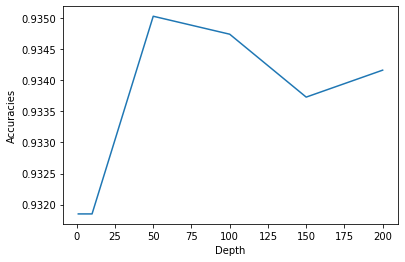

[0.9318509962460294, 0.9318509962460294, 0.9350274328616807, 0.9347386658966215, 0.9337279815189142, 0.9341611319665031]


In [ ]:
# Randomforest classifier - TF-IDF - with varying depth of trees
# Need to test this again.
depth = [1,10,50,100,150,200]
y_accuracy=[]
for x in depth:
    clf = Pipeline([('vect',  tfidf_vect),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(max_depth=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(depth,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Depth')
plt.show()
print(y_accuracy)

In [ ]:
#MultinomialNB - Count vectorizer
multinomialNB_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=1)),])
print("multinomialNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(multinomialNB_classifier)
print(confusion_matrix)

multinomialNB_classifier - Count Vectorizer:
0.9343055154490326
[[ 181  291]
 [ 164 6290]]


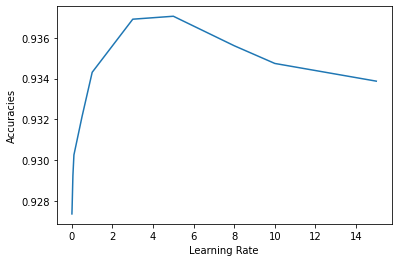

[0.9273751082876119, 0.9276638752526711, 0.9292520935604967, 0.9302627779382039, 0.9321397632110886, 0.9343055154490326, 0.9369044181345654, 0.937048801617095, 0.935604966791799, 0.9347386658966215, 0.9338723650014439]


In [ ]:
# for varying alpha
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
#Multinomial - Tf idf
multinomialNB_classifier2 = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=1)),])
print("multinomialNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(multinomialNB_classifier2)
print(confusion_matrix)

multinomialNB_classifier - Count Vectorizer:
0.9328616806237366
[[   9  463]
 [   2 6452]]


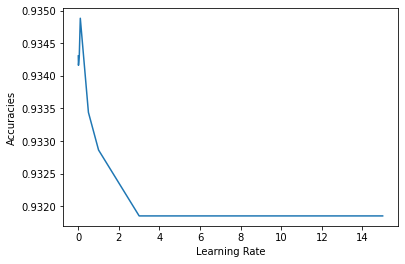

[0.9343055154490326, 0.9341611319665031, 0.9343055154490326, 0.934883049379151, 0.933439214553855, 0.9328616806237366, 0.9318509962460294, 0.9318509962460294, 0.9318509962460294, 0.9318509962460294, 0.9318509962460294]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
# BernoulliNB - Count vectorizer
bernoulliNB_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=1)),])
print("bernoulliNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(bernoulliNB_classifier)
print(confusion_matrix)

bernoulliNB_classifier - Count Vectorizer:
0.9019636153624025
[[ 175  297]
 [ 382 6072]]


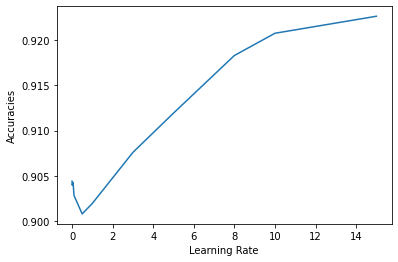

[0.9044181345654058, 0.9039849841178169, 0.9042737510828761, 0.9028299162575801, 0.9008085475021658, 0.9019636153624025, 0.9075945711810569, 0.9119260756569448, 0.9182789488882472, 0.9207334680912503, 0.9226104533641352]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
# BernoulliNB - Tf_idf
bernoulliNB_classifier2 = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=1)),])
print("bernoulliNB_classifier2 - vectorizer_tfidf:")
confusion_matrix = run_model_conf_matrix(bernoulliNB_classifier2)
print(confusion_matrix)


bernoulliNB_classifier2 - vectorizer_tfidf:
0.8958995090961595
[[ 190  282]
 [ 439 6015]]


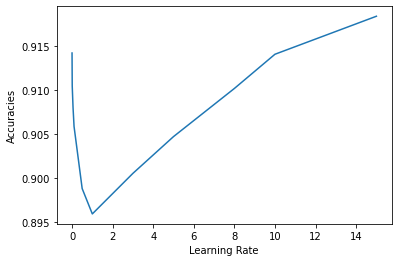

[0.9142362113774184, 0.9104822408316489, 0.9080277216286456, 0.9058619693907017, 0.8987871787467514, 0.8958995090961595, 0.9005197805371066, 0.904706901530465, 0.9101934738665897, 0.9140918278948889, 0.9184233323707768]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
# SVM -Count vectorizer
svm_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', SVC(kernel="linear", class_weight="balanced")),])
print("svm_classifier - vectorizer_counter:")
confusion_matrix = run_model_conf_matrix(svm_classifier)
print(confusion_matrix)

svm_classifier - vectorizer_counter:
0.8687554143805949
[[ 269  203]
 [ 706 5748]]


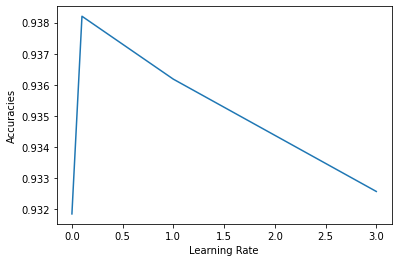

[0.9318509962460294, 0.9324285301761478, 0.9382038694773318, 0.9361825007219174, 0.9325729136586774]


In [ ]:
C = [0.001,0.01,0.1,1,3]
y_accuracy=[]
for x in C:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', SVC(C=x, kernel="linear")),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(C,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
# SVM -Count tfidf
svm_classifier2 = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=2890)),('clf', SVC(kernel="linear")),])
print("svm_classifier2 - vectorizer_tfidf:")
confusion_matrix = run_model_conf_matrix(svm_classifier2)
print(confusion_matrix)

svm_classifier2 - vectorizer_tfidf:
0.9358937337568582
[[  45  427]
 [  17 6437]]


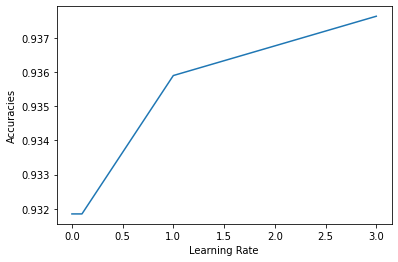

[0.9318509962460294, 0.9318509962460294, 0.9318509962460294, 0.9358937337568582, 0.9376263355472134]


In [ ]:
C = [0.001,0.01,0.1,1,3]
y_accuracy=[]
for x in C:
    clf = Pipeline([('vect', tfidf_vect),('chi',  SelectKBest(chi2, k=2890)),('clf', SVC(C=x, kernel="linear")),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(C,y_accuracy,'-')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

# Deep Learning Models
#### 1. Neural Network
#### 2. LSTM
#### 3. BERT Model


In [ ]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
np.random.seed(32)


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


%matplotlib inline

In [ ]:
train_text, test_text, train_y, test_y = train_test_split(data['processed_reviews'],data['Label'],test_size = 0.2)

In [ ]:
MAX_NB_WORDS = 17000
# 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/text.py:234: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 11516 unique tokens.


In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 15.1
max length: 739


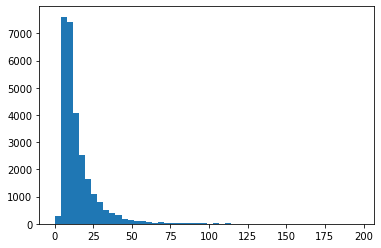

In [ ]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

In [ ]:
MAX_SEQUENCE_LENGTH = 125
# 250, 100, 
# 80, 
# 70, 

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (27701, 125)
Shape of data test tensor: (6926, 125)


In [ ]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (27701, 2)


In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50

N_CLASSES = 2

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='sigmoid')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop', metrics=['acc'])

model.fit(x_train, y_train, validation_split=0.1,
          epochs=50, batch_size=120)
#           epochs=20, batch_size=100)


output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

Epoch 1/50
208/208 [==============================] - 4s 5ms/step - loss: 0.3216 - acc: 0.9289 - val_loss: 0.2333 - val_acc: 0.9354
Epoch 2/50
208/208 [==============================] - 1s 4ms/step - loss: 0.2365 - acc: 0.9329 - val_loss: 0.2295 - val_acc: 0.9354
Epoch 3/50
208/208 [==============================] - 1s 4ms/step - loss: 0.2314 - acc: 0.9329 - val_loss: 0.2255 - val_acc: 0.9354
Epoch 4/50
208/208 [==============================] - 1s 6ms/step - loss: 0.2254 - acc: 0.9329 - val_loss: 0.2209 - val_acc: 0.9354
Epoch 5/50
208/208 [==============================] - 1s 6ms/step - loss: 0.2181 - acc: 0.9331 - val_loss: 0.2144 - val_acc: 0.9347
Epoch 6/50
208/208 [==============================] - 1s 6ms/step - loss: 0.2089 - acc: 0.9335 - val_loss: 0.2074 - val_acc: 0.9350
Epoch 7/50
208/208 [==============================] - 1s 6ms/step - loss: 0.1988 - acc: 0.9342 - val_loss: 0.2006 - val_acc: 0.9340
Epoch 8/50
208/208 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
output_test

array([[0.41130587, 0.58809286],
       [0.0553047 , 0.9447218 ],
       [0.1254443 , 0.87443346],
       ...,
       [0.35864747, 0.64067197],
       [0.0897488 , 0.91047037],
       [0.15961231, 0.8401827 ]], dtype=float32)

Epoch 1/50
208/208 [==============================] - 1s 5ms/step - loss: 0.1444 - acc: 0.9513 - val_loss: 0.1999 - val_acc: 0.9433
Epoch 2/50
208/208 [==============================] - 1s 4ms/step - loss: 0.1442 - acc: 0.9519 - val_loss: 0.1999 - val_acc: 0.9426
Epoch 3/50
208/208 [==============================] - 1s 4ms/step - loss: 0.1440 - acc: 0.9515 - val_loss: 0.2006 - val_acc: 0.9412
Epoch 4/50
208/208 [==============================] - 1s 4ms/step - loss: 0.1438 - acc: 0.9520 - val_loss: 0.2003 - val_acc: 0.9419
Epoch 5/50
208/208 [==============================] - 1s 4ms/step - loss: 0.1437 - acc: 0.9515 - val_loss: 0.2002 - val_acc: 0.9423
Epoch 6/50
208/208 [==============================] - 1s 4ms/step - loss: 0.1435 - acc: 0.9520 - val_loss: 0.2005 - val_acc: 0.9430
Epoch 7/50
208/208 [==============================] - 1s 4ms/step - loss: 0.1433 - acc: 0.9517 - val_loss: 0.2015 - val_acc: 0.9433
Epoch 8/50
208/208 [==============================] - 1s 4ms/step - loss: 0.

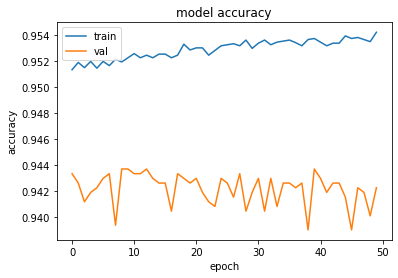

In [ ]:
import keras
from matplotlib import pyplot as plt
history = model.fit(x_train, y_train, validation_split=0.1,
          epochs=50, batch_size=120)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## LSTM

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(2, activation='sigmoid')(x)


model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['acc'])

model.fit(x_train, y_train, validation_split=0.1,
          epochs=3, batch_size=100)

output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

Epoch 1/3
250/250 [==============================] - 115s 441ms/step - loss: 0.1557 - acc: 0.9457 - val_loss: 0.2095 - val_acc: 0.9423
Epoch 2/3
250/250 [==============================] - 109s 436ms/step - loss: 0.1461 - acc: 0.9498 - val_loss: 0.1945 - val_acc: 0.9415
Epoch 3/3
217/217 [==============================] - 8s 34ms/step
test auc: 0.8253908403824688


## BERT Model

In [ ]:
#!pip install transformers

In [ ]:
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification

In [ ]:
data['Label'] = data['Label'].astype(int)

In [ ]:
# Splitting the dataset into a 85-15 train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data["processed_reviews"], 
                                                  data["Label"], 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  stratify=data["Label"])

# # creating a column data_type to denote whether each record is for test or train
# df['data_type'] = ['not_set']*df.shape[0]
# df.loc[X_train, 'data_type'] = 'train'
# df.loc[X_val, 'data_type'] = 'val'
# df.groupby(['y', 'label', 'data_type']).count()

In [ ]:
# Initializing tokenizer from pretrained BERTTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)              
# Encoding training batch                           
encoded_data_train = tokenizer.batch_encode_plus(
    X_train.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)
# Encoding validation batch                           
encoded_data_val = tokenizer.batch_encode_plus(
    X_val.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

# creating tensors
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

labels_val = torch.tensor(y_val.values)
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Initializing the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Import and initialization of dataloaders and batch size hyperparameter
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
# Importing the adam optimizer and a scheduler to manage learning rate in an optimal fashion
from transformers import AdamW, get_linear_schedule_with_warmup

# Initializing the optimizer 
#uses the adam algorithm - an extension to stochastic gradient descent
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
#epoch hyperparameter
epochs = 3

# Scheduler to increase learning rate for a certain number of steps then linearly deacrese the same
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
#Function definition for f1 score and accuracy calculations
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    correct=0
    total=0
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
        correct+=len(y_preds[y_preds==label])
        total+=len(y_true)
    print(f'Bert Model Accuracy Overall :',correct/total)

In [ ]:
#GPU vs CPU - based on whether the local/hosted runtime has an nvidia GPU available or not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
import random

# Sets torchs seed to randomize to enable usage of torch.random()
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Evaluate function to be used to validate the data
# tqdm to display the live progress of the model training, calculates average loss, predictions and true values.
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs,return_dict=False)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
  
# Training the model
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        outputs = model(**inputs,return_dict=False)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
      
    # Training results
    tqdm.write(f'\nEpoch {epoch}')
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')

    #save the trained model to use for validation directly by loading it
    torch.save(model.state_dict(), f'bertmodel{epoch}.model')
    
    #Validation results
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/9234 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.2942712954896641
Validation loss: 0.27888445588580085
F1 Score (Weighted): 0.9177407127648602


Epoch 2:   0%|          | 0/9234 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.23489099548635647
Validation loss: 0.27302703357384034
F1 Score (Weighted): 0.9344331581330835


Epoch 3:   0%|          | 0/9234 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.17660467628085882
Validation loss: 0.3405871304256838
F1 Score (Weighted): 0.9353190252232781


In [ ]:
# confusion matrix for validation outputs
from sklearn.metrics import confusion_matrix
pred_arr = np.argmax(predictions, 1)
print("CONFUSION MATRIX")
conf_matrix=confusion_matrix(true_vals, pred_arr)
print(conf_matrix)
for i in range(2):
  print("True Value: ", i)
  for j in range(2):
    print("predicted as ", j, "is ", conf_matrix[i][j])

CONFUSION MATRIX
[[ 181  281]
 [ 129 6335]]
True Value:  0
predicted as  0 is  181
predicted as  1 is  281
True Value:  1
predicted as  0 is  129
predicted as  1 is  6335


In [ ]:
#classification report for the validation outputs
from sklearn.metrics import classification_report
target_names = ['Negative', 'positive']
print(classification_report(true_vals, pred_arr, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.58      0.39      0.47       462
    positive       0.96      0.98      0.97      6464

    accuracy                           0.94      6926
   macro avg       0.77      0.69      0.72      6926
weighted avg       0.93      0.94      0.94      6926

